In [1]:

from keras import backend as K
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.constraints import maxnorm
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse, random, pickle, cv2, os, matplotlib
import seaborn as sb
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [0]:
gen = ImageDataGenerator()
trainX   = []
trainY  = []
testX = []
testY = []

In [0]:
imagePaths = sorted(list(paths.list_images('blz/Train')))
random.seed(42)
random.shuffle(imagePaths)
for imagePath in imagePaths:
	image = cv2.imread(imagePath)
	image = cv2.resize(image, (64, 64))
	trainX.append(image)    
	gen.apply_transform(image,{'theta':40,'shear':40,'zx':0.4,'zy':0.4})
	gen.apply_transform(image,{'flip_horizontal':True})
	gen.apply_transform(image,{'zoom_rage':0.4})
	trainX.append(image)
	label = imagePath.split(os.path.sep)[-2]
	trainY.append(label)
	trainY.append(label)

In [4]:
len(trainX),len(trainY)

(8572, 8572)

In [0]:
imagePaths = sorted(list(paths.list_images('blz/Test')))
random.seed(42)
random.shuffle(imagePaths)
for imagePath in imagePaths:
	image = cv2.imread(imagePath)
	image = cv2.resize(image, (64, 64))
	testX.append(image)    
	gen.apply_transform(image,{'theta':40,'shear':40,'zx':0.4,'zy':0.4})
	gen.apply_transform(image,{'flip_horizontal':True})
	gen.apply_transform(image,{'zoom_rage':0.4})
	testX.append(image)
	label = imagePath.split(os.path.sep)[-2]
	testY.append(label)
	testY.append(label)

In [6]:
len(testX),len(testY)

(88, 88)

In [0]:
d = {'t1' : 'A', 't2' : 'B' , 't3' : 'D', 't4' : 'C'}
testY = [d.get(n, n) for n in testY]

In [8]:
trainX = np.array(trainX, dtype="float") / 255.0
trainY = np.array(trainY)
testX = np.array(testX, dtype="float") / 255.0
testY = np.array(testY)
(trainY,testY)

(array(['B', 'B', 'C', ..., 'A', 'B', 'B'], dtype='<U1'),
 array(['A', 'A', 'A', 'A', 'A', 'A', 'C', 'C', 'C', 'C', 'B', 'B', 'D',
        'D', 'D', 'D', 'A', 'A', 'C', 'C', 'D', 'D', 'B', 'B', 'D', 'D',
        'B', 'B', 'B', 'B', 'D', 'D', 'C', 'C', 'C', 'C', 'D', 'D', 'B',
        'B', 'D', 'D', 'B', 'B', 'D', 'D', 'D', 'D', 'C', 'C', 'A', 'A',
        'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'D', 'D', 'C', 'C', 'A',
        'A', 'D', 'D', 'A', 'A', 'C', 'C', 'A', 'A', 'A', 'A', 'B', 'B',
        'B', 'B', 'B', 'B', 'A', 'A', 'A', 'A', 'C', 'C'], dtype='<U1'))

In [0]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [10]:
model = Sequential()
model.add(ZeroPadding2D((4,4),input_shape=(64,64,3)))

model.add(Convolution2D(64,(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Convolution2D(128,(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Convolution2D(128,(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Convolution2D(256,(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Convolution2D(256,(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Convolution2D(512,(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024, input_shape=(4096,), activation="relu", kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(len(lb.classes_), activation="softmax", kernel_constraint=maxnorm(3)))
model.summary()

W0810 15:02:24.200105 140713386661760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0810 15:02:24.218903 140713386661760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0810 15:02:24.224703 140713386661760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0810 15:02:24.249912 140713386661760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0810 15:02:24.251070 1407133866

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 72, 72, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 36, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 18, 18, 128)       0         
__________

In [11]:
BS = 16
EPOCHS = 10
print("[INFO] training network.....")
sgd = SGD(lr=0.007,momentum=0.9, decay=1e-6, nesterov=True,clipvalue=1)
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])

W0810 15:02:25.431979 140713386661760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



[INFO] training network.....


In [12]:
H = model.fit(trainX, trainY, validation_data = (testX , testY),  epochs=EPOCHS,   batch_size=BS)

W0810 15:02:25.554087 140713386661760 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 8572 samples, validate on 88 samples
Epoch 1/10
8572/8572 [==============================] - 11s 1ms/step - loss: 0.8004 - acc: 0.6777 - val_loss: 1.8444 - val_acc: 0.5455
Epoch 2/10
8572/8572 [==============================] - 8s 957us/step - loss: 0.3383 - acc: 0.8882 - val_loss: 0.3985 - val_acc: 0.8636
Epoch 3/10
8572/8572 [==============================] - 8s 955us/step - loss: 0.2076 - acc: 0.9309 - val_loss: 0.7268 - val_acc: 0.8864
Epoch 4/10
8572/8572 [==============================] - 8s 960us/step - loss: 0.1383 - acc: 0.9537 - val_loss: 0.2665 - val_acc: 0.9091
Epoch 5/10
8572/8572 [==============================] - 8s 962us/step - loss: 0.0990 - acc: 0.9693 - val_loss: 0.3768 - val_acc: 0.9545
Epoch 6/10
8572/8572 [==============================] - 8s 960us/step - loss: 0.0817 - acc: 0.9748 - val_loss: 0.3995 - val_acc: 0.9091
Epoch 7/10
8572/8572 [==============================] - 8s 957us/step - loss: 0.0680 - acc: 0.9788 - val_loss: 0.1700 - val_acc: 0.9091
Epo

[INFO] evaluating network...
              precision    recall  f1-score   support

           A       0.91      0.91      0.91        22
           B       1.00      1.00      1.00        22
           C       0.92      1.00      0.96        22
           D       1.00      0.91      0.95        22

    accuracy                           0.95        88
   macro avg       0.96      0.95      0.95        88
weighted avg       0.96      0.95      0.95        88



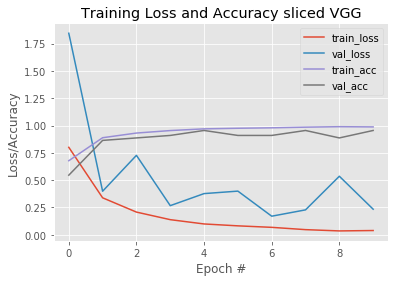

In [13]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=BS)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["acc"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy sliced VGG")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

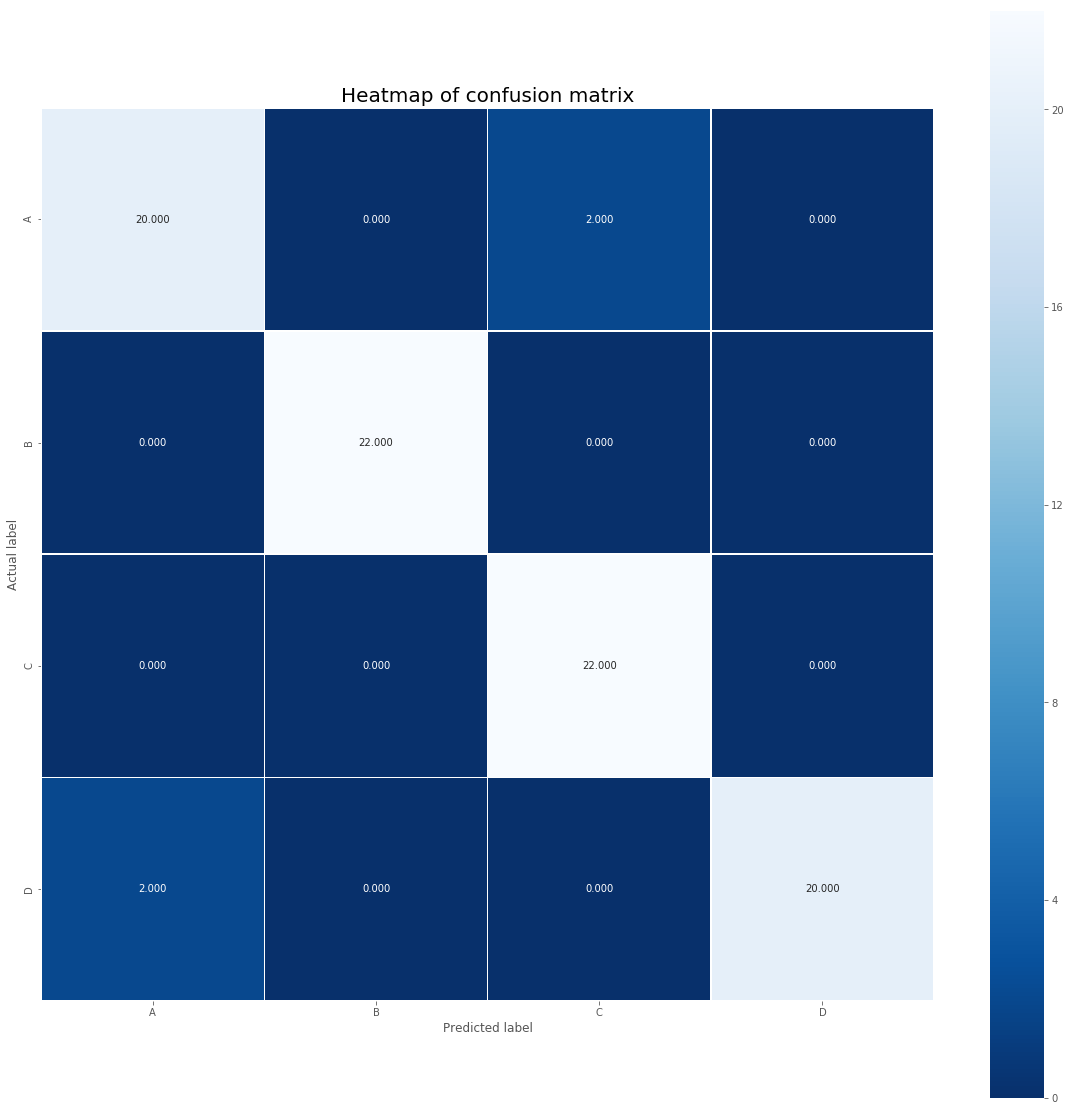

In [14]:
matrix = confusion_matrix(testY.argmax(axis=1),predictions.argmax(axis=1))
f,ax = plt.subplots(figsize=(20,20))
sb.heatmap(matrix, mask=np.zeros_like(matrix, dtype=np.bool),
square=True, ax=ax, annot = True,fmt=".3f", linewidths=.5, cmap = 'Blues_r')
ax.xaxis.set_ticklabels(lb.classes_); 
ax.yaxis.set_ticklabels(lb.classes_);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Heatmap of confusion matrix", size = 20);
plt.autoscale()